In [592]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D, proj3d
#from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [593]:
customers = pd.read_csv('mall_customers.csv')
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [103]:
print(customers.shape)

(200, 5)


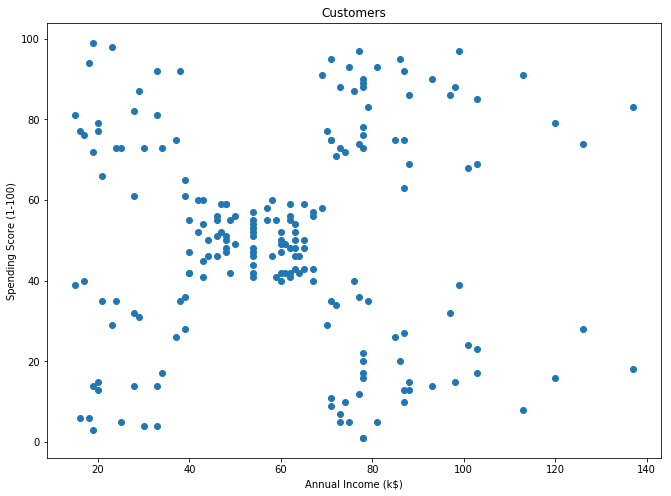

In [594]:
x = customers.iloc[:, [3,4]].values
plt.figure(figsize=(11, 8))
plt.scatter(customers.iloc[:, 3], customers.iloc[:, 4])
plt.title('Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [595]:
# Elbow Method
WCSS = []
for j in range(1,11):
    kmeans = KMeans(n_clusters=j, init='k-means++', n_init=10, random_state=123)
    kmeans.fit(x)
    W = kmeans.inertia_  # Sum of squared distances of samples
                         # to their closest cluster center
    WCSS.append(W)
print("WCSS:", WCSS)

WCSS: [269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30273.394312070042, 25029.25342493588, 21794.8856090982, 19664.685196005543]


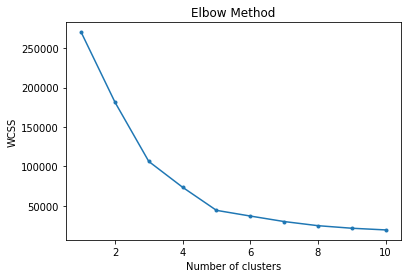

In [596]:
plt.plot(range(1, 11), WCSS, '.-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

For K = 2 the average silhouette_score is : 0.2968969162503008
For K = 3 the average silhouette_score is : 0.46761358158775435
For K = 4 the average silhouette_score is : 0.4931963109249047
For K = 5 the average silhouette_score is : 0.553931997444648
For K = 6 the average silhouette_score is : 0.53976103063432
For K = 7 the average silhouette_score is : 0.5270287298101395
For K = 8 the average silhouette_score is : 0.4558493609925033
For K = 9 the average silhouette_score is : 0.4605043439759829
For K = 10 the average silhouette_score is : 0.449795408266166


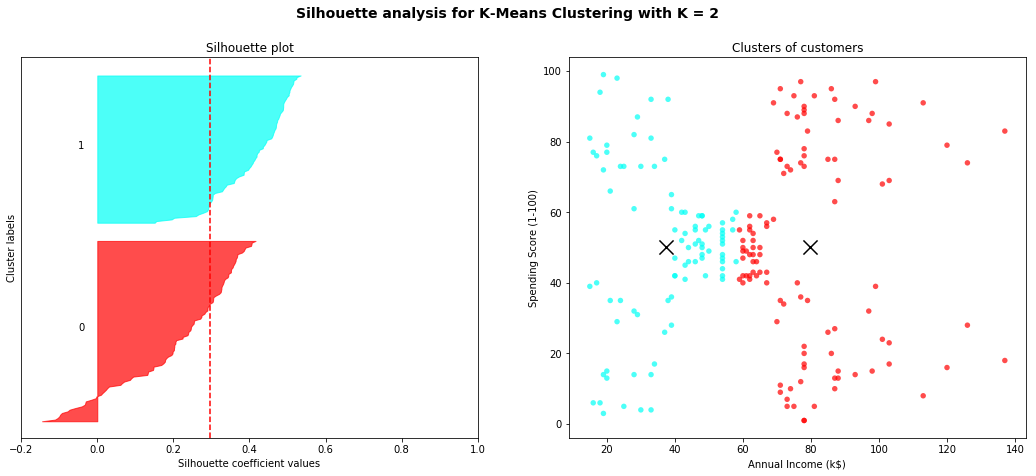

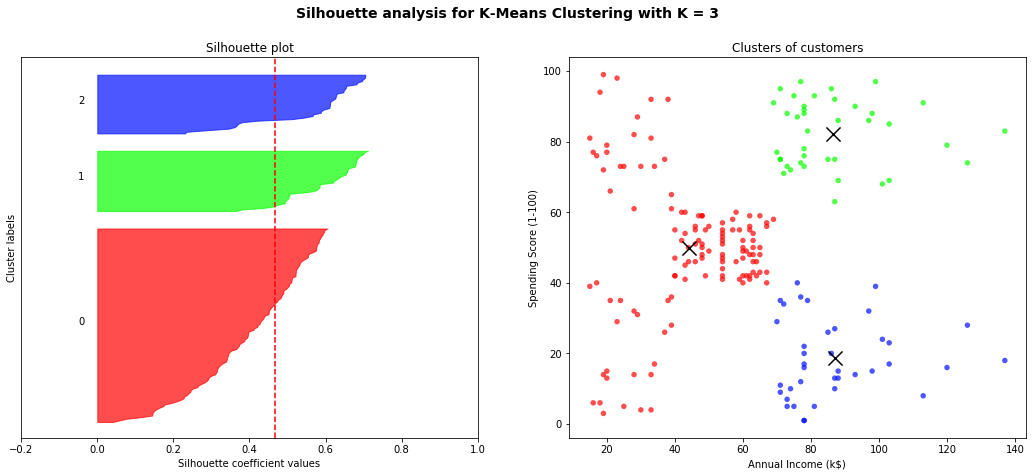

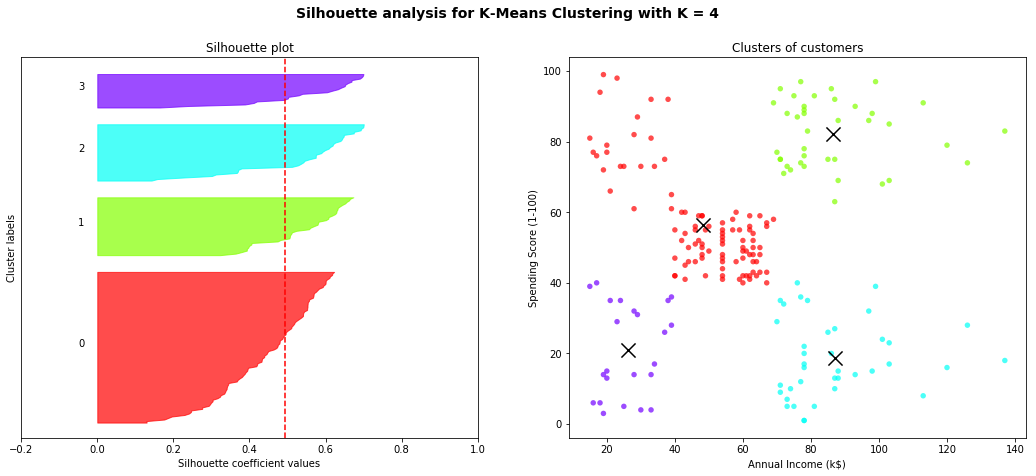

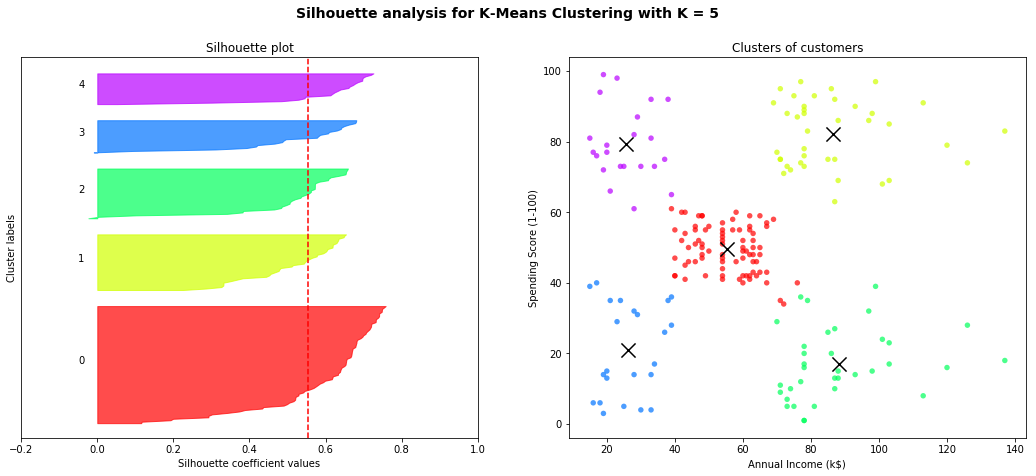

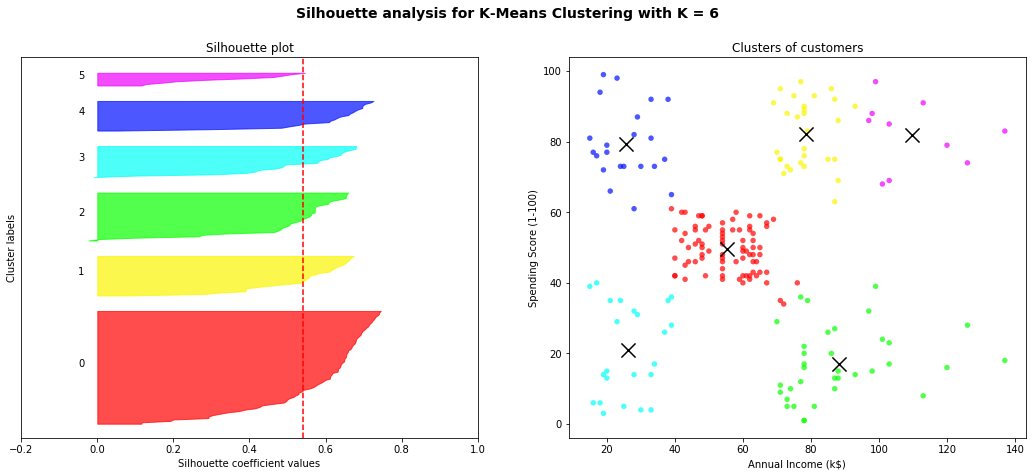

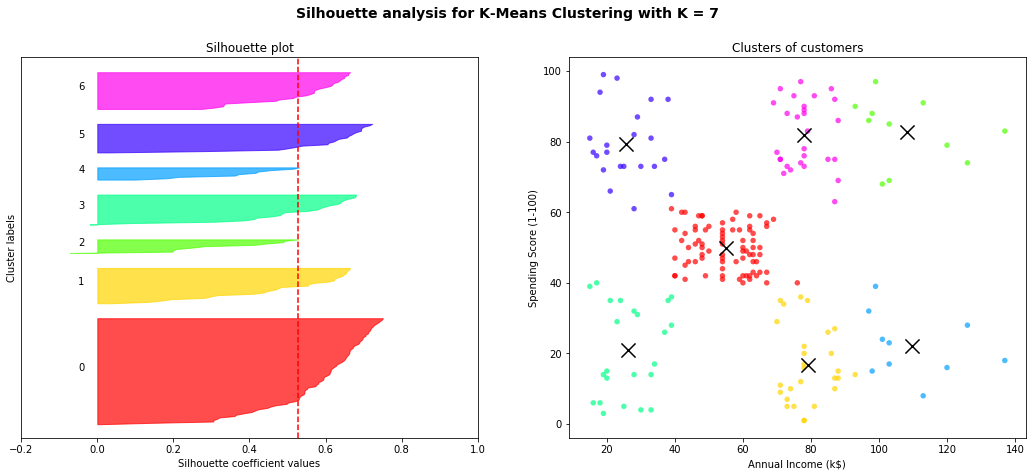

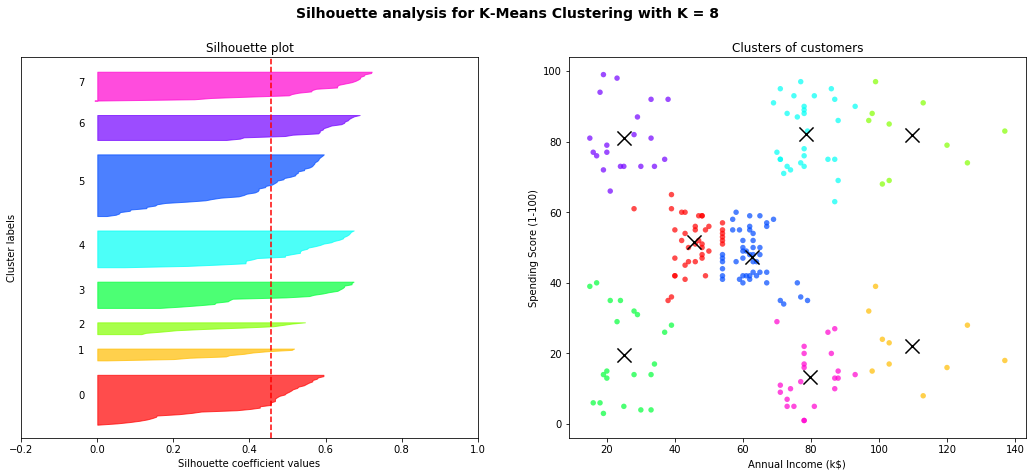

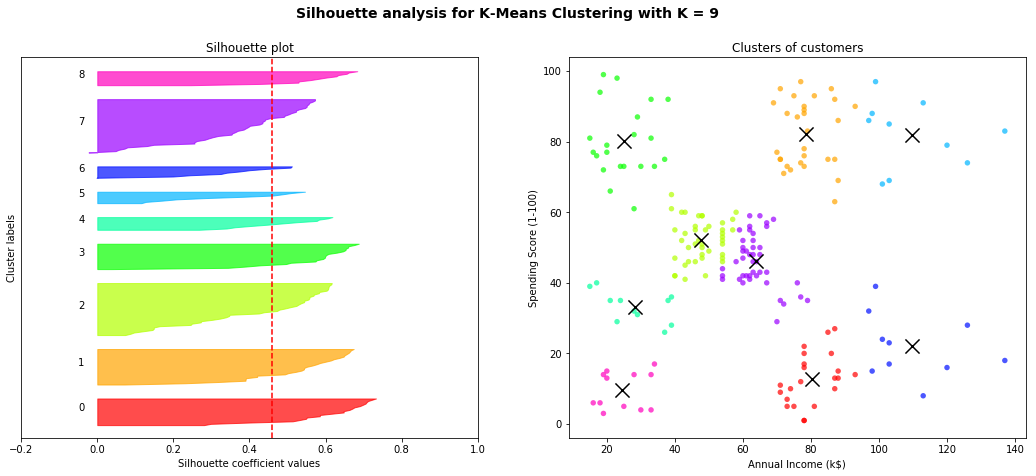

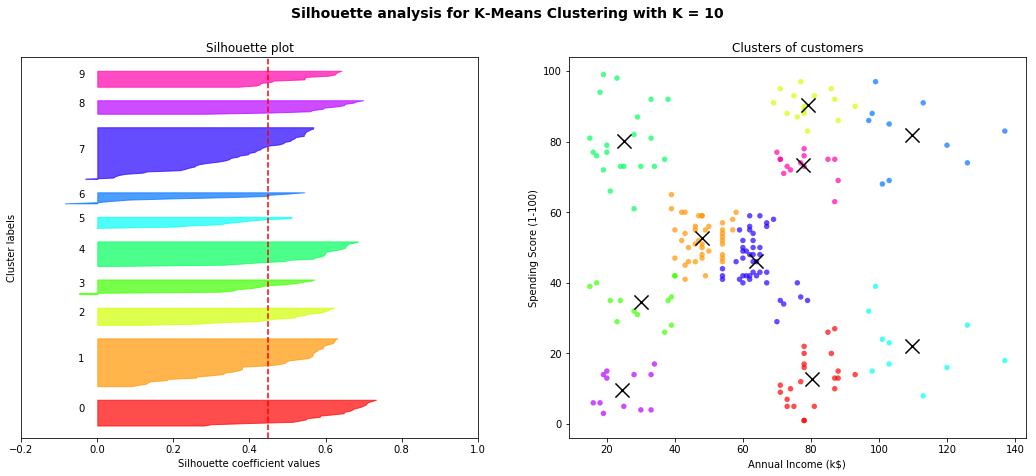

In [597]:
# Silhouette Method
for j in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # 1st subplot: silhouette plot
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(x) + (j + 1) * 10])
    
    clusterer = KMeans(n_clusters=j, init='k-means++', n_init=10, random_state=123)
    cluster_labels = clusterer.fit_predict(x)
    
    # The silhouette_score gives the average value for all the samples
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For K =", j,
          "the average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    
    y_lower = 10    
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv(float(i) / j)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster labels")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.hsv(cluster_labels.astype(float) / j)
    ax2.scatter(x[:, 0], x[:, 1], s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='x',
                c="black", alpha=1, s=200)

    ax2.set_title("Clusters of customers")
    ax2.set_xlabel("Annual Income (k$)")
    ax2.set_ylabel("Spending Score (1-100)")

    plt.suptitle(("Silhouette analysis for K-Means Clustering "
                  "with K = %d" % j),
                 fontsize=14, fontweight='bold')

plt.show()

In [601]:
# K = 5
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, verbose=1, random_state=123)
# init='random' implies more iterations to obtain convergence (generally between 5 and 10)
# init='k-means++' generally requires only between 3 and 5 iterations to obtain convergence
C = kmeans.fit_predict(x)  # clustering
print("Clustering:", C)
print("")

cluster_list = list(C)
print("Cluster A:", cluster_list.count(0), "customers")
print("Cluster B:", cluster_list.count(1), "customers")
print("Cluster C:", cluster_list.count(2), "customers")
print("Cluster D:", cluster_list.count(3), "customers")
print("Cluster E:", cluster_list.count(4), "customers")

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 48546.01637351638
start iteration
done sorting
end inner loop
Iteration 1, inertia 44537.16153049849
start iteration
done sorting
end inner loop
Iteration 2, inertia 44448.45544793371
start iteration
done sorting
end inner loop
Iteration 3, inertia 44448.45544793371
center shift 0.000000e+00 within tolerance 6.749532e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 49489.91559877955
start iteration
done sorting
end inner loop
Iteration 1, inertia 44593.59583912023
start iteration
done sorting
end inner loop
Iteration 2, inertia 44489.3318656652
start iteration
done sorting
end inner loop
Iteration 3, inertia 44454.47647967974
start iteration
done sorting
end inner loop
Iteration 4, inertia 44454.47647967974
center shift 0.000000e+00 within tolerance 6.749532e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 49348

In [602]:
print("Centroids:", kmeans.cluster_centers_)
print("WCSS:", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)

Centroids: [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]
WCSS: 44448.45544793371
Number of iterations: 3


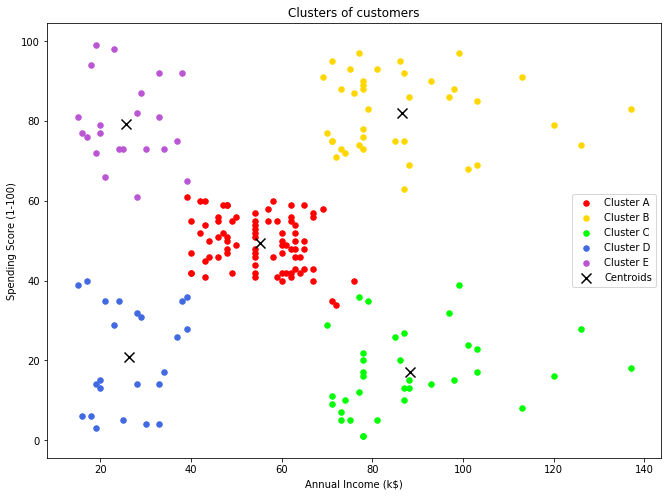

In [603]:
plt.figure(1 , figsize = (11 , 8))
plt.scatter(x[C == 0, 0], x[C == 0, 1], color = 'red', s = 30, label = 'Cluster A')
plt.scatter(x[C == 1, 0], x[C == 1, 1], color = 'gold', s = 30, label = 'Cluster B')
plt.scatter(x[C == 2, 0], x[C == 2, 1], color = 'lime', s = 30, label = 'Cluster C')
plt.scatter(x[C == 3, 0], x[C == 3, 1], color = 'royalblue', s = 30, label = 'Cluster D')
plt.scatter(x[C == 4, 0], x[C == 4, 1], color = 'mediumorchid', s = 30, label = 'Cluster E')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', s = 100, marker = 'x', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
# 3D

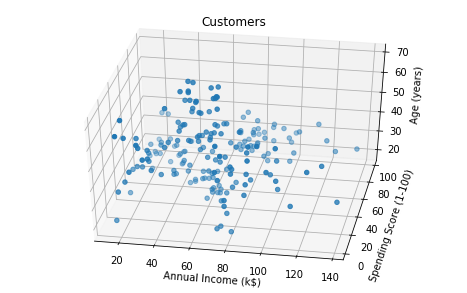

In [604]:
x_3D = customers.iloc[:, [2,3,4]].values
fig = plt.figure()
fig.set_size_inches(8, 5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(customers.iloc[:, 3], customers.iloc[:, 4], customers.iloc[:, 2])
ax.view_init(elev=40., azim=-80)
plt.title('Customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age (years)')
plt.show()

In [605]:
WCSS_3D = []
for j in range(1,11):
    kmeans_3D = KMeans(n_clusters=j, init='k-means++', n_init=10, random_state=234)
    kmeans_3D.fit(x_3D)
    W_3D = kmeans_3D.inertia_  # Sum of squared distances of samples
                         # to their closest cluster center
    WCSS_3D.append(W_3D)
print("WCSS_3D:", WCSS_3D)

WCSS_3D: [308812.78, 212840.16982097185, 143342.751571706, 104366.15145556198, 75350.77917248776, 58300.44332159069, 51118.949931647294, 44310.50582506423, 40953.914891678585, 38172.00929773929]


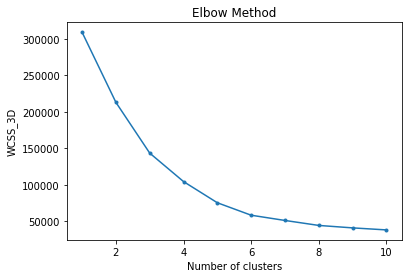

In [606]:
plt.plot(range(1, 11), WCSS_3D, '.-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS_3D')
plt.show()

For K = 2 the average silhouette_score is : 0.293166070535953
For K = 3 the average silhouette_score is : 0.3839349967742105
For K = 4 the average silhouette_score is : 0.40546302077733304
For K = 5 the average silhouette_score is : 0.44364987032532566
For K = 6 the average silhouette_score is : 0.4523443947724053
For K = 7 the average silhouette_score is : 0.4350709933804177
For K = 8 the average silhouette_score is : 0.4307991110543737
For K = 9 the average silhouette_score is : 0.38481393087916216
For K = 10 the average silhouette_score is : 0.4053316116581115


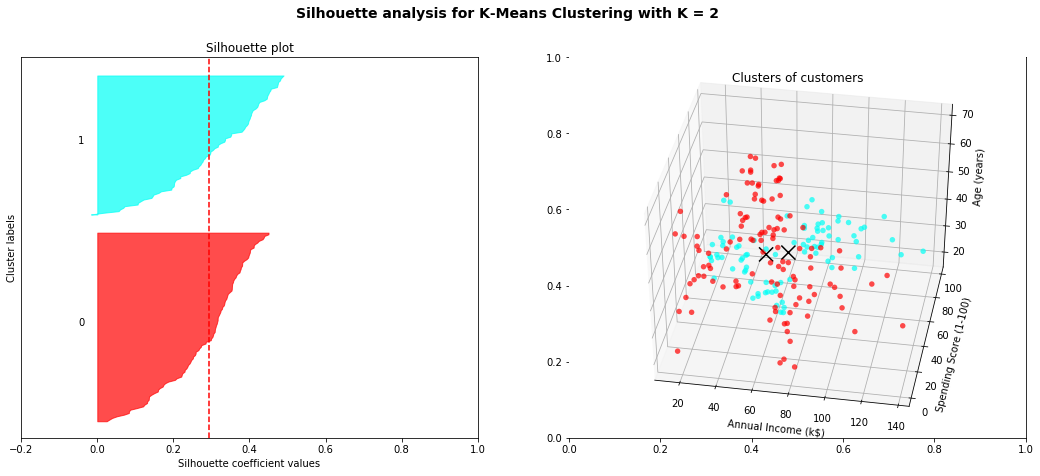

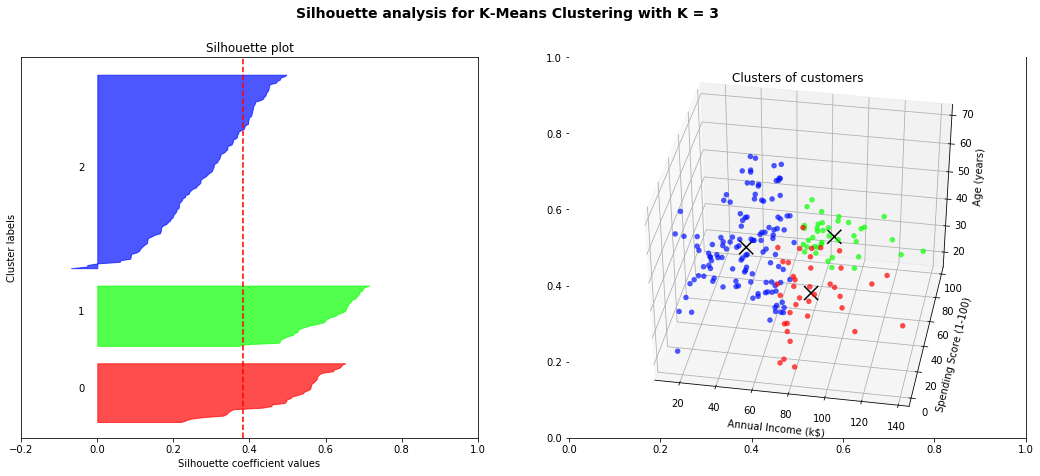

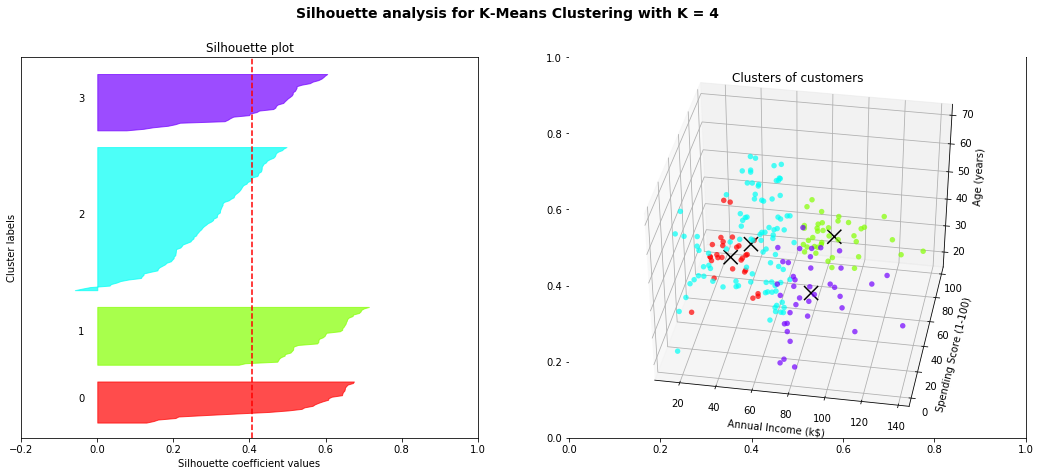

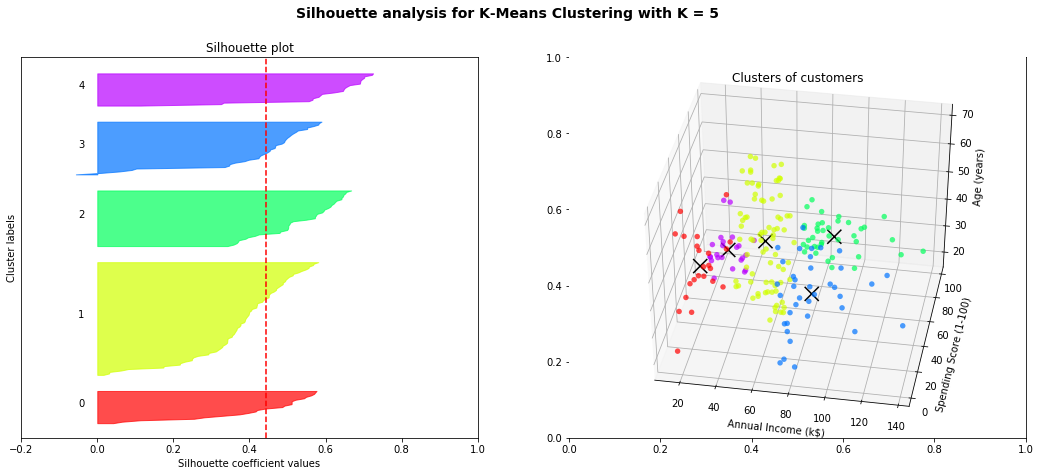

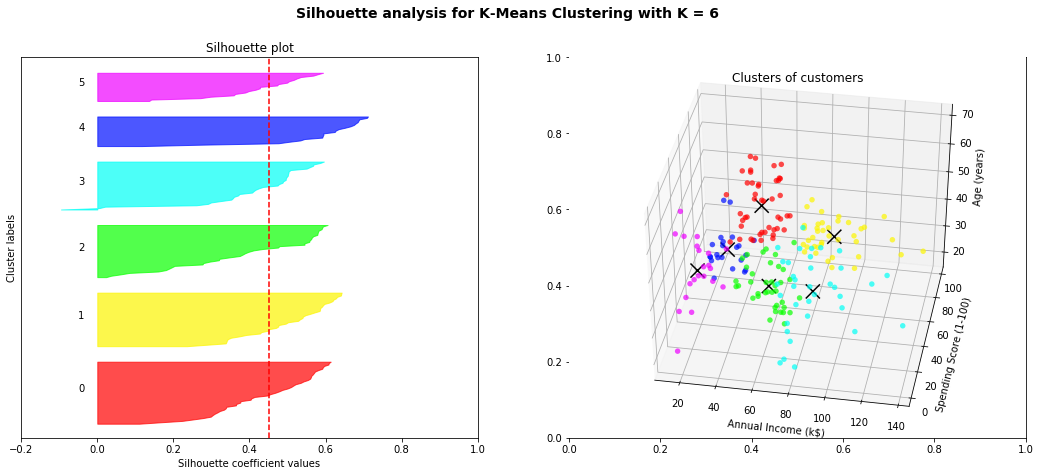

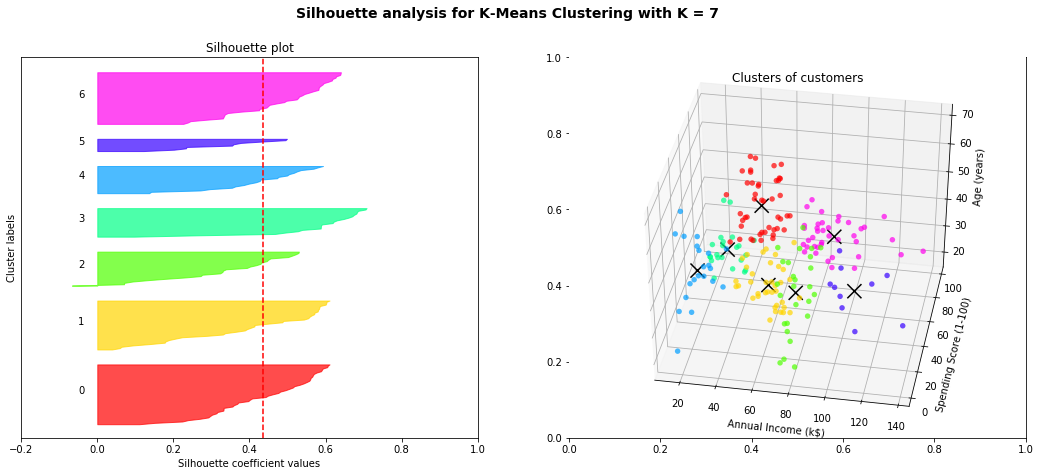

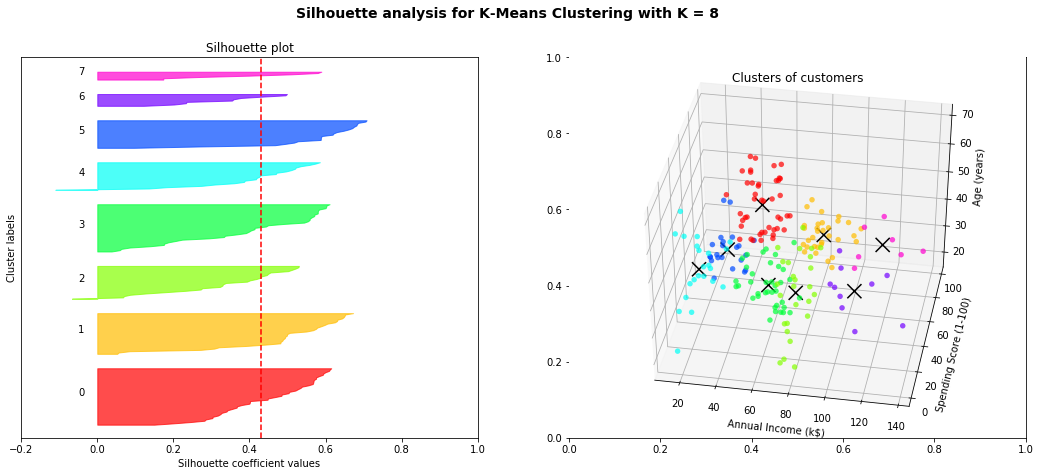

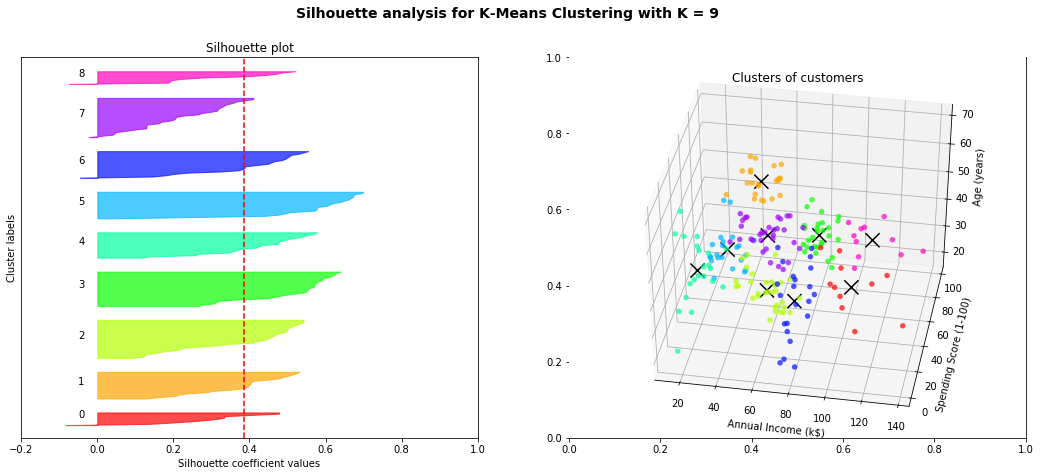

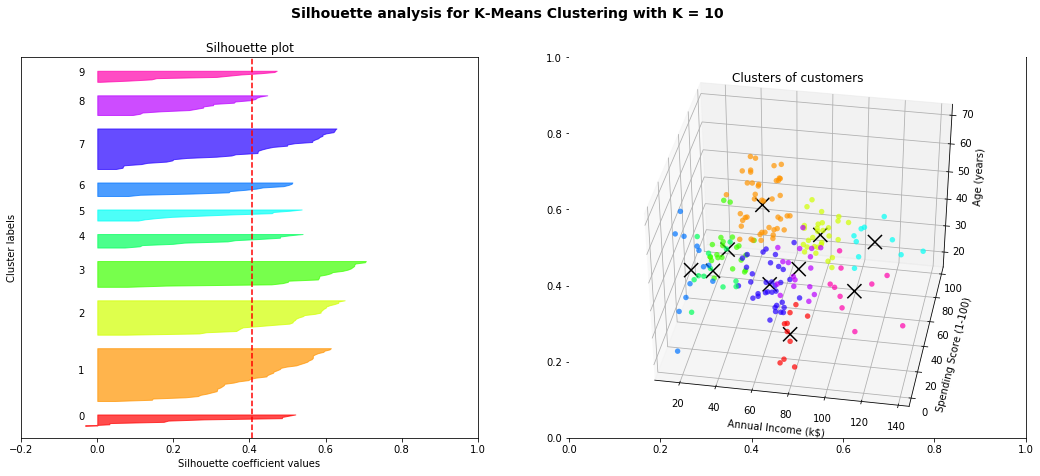

In [607]:
# Silhouette Method
for j in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # 1st subplot: silhouette plot
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(x) + (j + 1) * 10])
    
    clusterer_3D = KMeans(n_clusters=j, init='k-means++', n_init=10, random_state=123)
    cluster_labels_3D = clusterer_3D.fit_predict(x_3D)
    
    # The silhouette_score gives the average value for all the samples
    silhouette_avg_3D = silhouette_score(x_3D, cluster_labels_3D)
    print("For K =", j,
          "the average silhouette_score is :", silhouette_avg_3D)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values_3D = silhouette_samples(x_3D, cluster_labels_3D)
    
    y_lower = 10    
    for i in range(j):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values_3D = \
            sample_silhouette_values_3D[cluster_labels_3D == i]

        ith_cluster_silhouette_values_3D.sort()
        
        size_cluster_i_3D = ith_cluster_silhouette_values_3D.shape[0]
        y_upper = y_lower + size_cluster_i_3D

        color_3D = cm.hsv(float(i) / j)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values_3D,
                          facecolor=color_3D, edgecolor=color_3D, alpha=0.7)
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i_3D, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("Silhouette plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster labels")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_3D, color="red", linestyle="--")
    
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    # 2nd Plot showing the actual clusters formed
    colors_3D = cm.hsv(cluster_labels_3D.astype(float) / j)
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x_3D[:, 1], x_3D[:, 2], x_3D[:, 0], s=30, lw=0, alpha=0.7,
                c=colors_3D, edgecolor='k')

    # Labeling the clusters
    centers_3D = clusterer_3D.cluster_centers_
    ax2.scatter(centers_3D[:, 1], centers_3D[:, 2], centers_3D[:, 0], marker='x',
                c="black", alpha=1, s=200)

    ax2.view_init(elev=40., azim=-80)
    ax2.set_title("Clusters of customers")
    ax2.set_xlabel("Annual Income (k$)")
    ax2.set_ylabel("Spending Score (1-100)")
    ax2.set_zlabel("Age (years)")

    plt.suptitle(("Silhouette analysis for K-Means Clustering "
                  "with K = %d" % j),
                 fontsize=14, fontweight='bold')

plt.show()

In [608]:
# K = 5
kmeans_3D = KMeans(n_clusters=5, init='k-means++', n_init=10, verbose=1, random_state=234)
# init='random' implies more iterations to obtain convergence (generally between 5 and 10)
# init='k-means++' generally requires only between 3 and 5 iterations to obtain convergence
C_3D = kmeans_3D.fit_predict(x_3D)  # clustering
print("Clustering:", C_3D)
print("")

cluster_list = list(C_3D)
print("Cluster A:", cluster_list.count(0), "customers")
print("Cluster B:", cluster_list.count(1), "customers")
print("Cluster C:", cluster_list.count(2), "customers")
print("Cluster D:", cluster_list.count(3), "customers")
print("Cluster E:", cluster_list.count(4), "customers")

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 104554.50252525252
start iteration
done sorting
end inner loop
Iteration 1, inertia 90658.56838464738
start iteration
done sorting
end inner loop
Iteration 2, inertia 85967.33656338134
start iteration
done sorting
end inner loop
Iteration 3, inertia 85669.5460986366
start iteration
done sorting
end inner loop
Iteration 4, inertia 85630.91749911988
start iteration
done sorting
end inner loop
Iteration 5, inertia 85630.91749911988
center shift 0.000000e+00 within tolerance 5.146880e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 84238.63302079347
start iteration
done sorting
end inner loop
Iteration 1, inertia 83447.47213984547
start iteration
done sorting
end inner loop
Iteration 2, inertia 83092.35322723255
start iteration
done sorting
end inner loop
Iteration 3, inertia 82873.81768648018
start iteration
done sorting
end inner loop
Iteration 4, inertia 8

In [609]:
print("Centroids:", kmeans_3D.cluster_centers_)
print("WCSS:", kmeans_3D.inertia_)
print("Number of iterations:", kmeans_3D.n_iter_)

Centroids: [[25.52173913 26.30434783 78.56521739]
 [32.69230769 86.53846154 82.12820513]
 [43.08860759 55.29113924 49.56962025]
 [40.66666667 87.75       17.58333333]
 [45.2173913  26.30434783 20.91304348]]
WCSS: 75350.77917248776
Number of iterations: 4


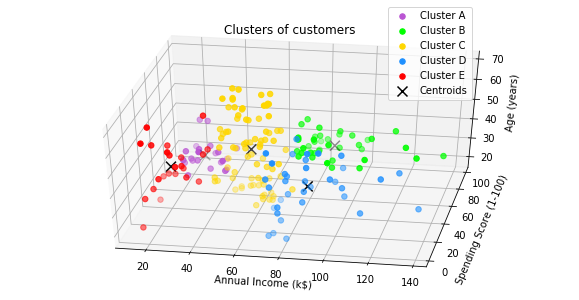

In [610]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3D[C_3D == 0, 1], x_3D[C_3D == 0, 2], x_3D[C_3D == 0, 0], color = 'mediumorchid', s = 30, label = 'Cluster A')
ax.scatter(x_3D[C_3D == 1, 1], x_3D[C_3D == 1, 2], x_3D[C_3D == 1, 0], color = 'lime', s = 30, label = 'Cluster B')
ax.scatter(x_3D[C_3D == 2, 1], x_3D[C_3D == 2, 2], x_3D[C_3D == 2, 0], color = 'gold', s = 30, label = 'Cluster C')
ax.scatter(x_3D[C_3D == 3, 1], x_3D[C_3D == 3, 2], x_3D[C_3D == 3, 0], color = 'dodgerblue', s = 30, label = 'Cluster D')
ax.scatter(x_3D[C_3D == 4, 1], x_3D[C_3D == 4, 2], x_3D[C_3D == 4, 0], color = 'red', s = 30, label = 'Cluster E')
ax.scatter(kmeans_3D.cluster_centers_[:, 1], kmeans_3D.cluster_centers_[:, 2], kmeans_3D.cluster_centers_[:, 0], color = 'black', s = 100, marker = 'x', label = 'Centroids')
ax.view_init(elev=40., azim=-80)
plt.title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age (years)')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend(loc="lower left", bbox_to_anchor=f(110,70,60), 
          bbox_transform=ax.transData)
plt.show()

In [611]:
A = np.array([[x_3D[C_3D == 0, 0]], [x_3D[C_3D == 0, 1]], [x_3D[C_3D == 0, 2]]])
A_t = A.transpose()
B = np.array([[x_3D[C_3D == 1, 0]], [x_3D[C_3D == 1, 1]], [x_3D[C_3D == 1, 2]]])
B_t = B.transpose()
C = np.array([[x_3D[C_3D == 2, 0]], [x_3D[C_3D == 2, 1]], [x_3D[C_3D == 2, 2]]])
C_t = C.transpose()
D = np.array([[x_3D[C_3D == 3, 0]], [x_3D[C_3D == 3, 1]], [x_3D[C_3D == 3, 2]]])
D_t = D.transpose()
E = np.array([[x_3D[C_3D == 4, 0]], [x_3D[C_3D == 4, 1]], [x_3D[C_3D == 4, 2]]])
E_t = E.transpose()

In [612]:
print('Age customers in Cluster A:', min(A[0][0]),'-',max(A[0][0]))
print('Age customers in Cluster B:', min(B[0][0]),'-',max(B[0][0]))
print('Age customers in Cluster C:', min(C[0][0]),'-',max(C[0][0]))
print('Age customers in Cluster D:', min(D[0][0]),'-',max(D[0][0]))
print('Age customers in Cluster E:', min(E[0][0]),'-',max(E[0][0]))

Age customers in Cluster A: 18 - 35
Age customers in Cluster B: 27 - 40
Age customers in Cluster C: 18 - 70
Age customers in Cluster D: 19 - 59
Age customers in Cluster E: 19 - 67


In [613]:
# K = 6
kmeans_3D_6 = KMeans(n_clusters=6, init='k-means++', n_init=10, verbose=1, random_state=234)
# init='random' implies more iterations to obtain convergence (generally between 5 and 10)
# init='k-means++' generally requires only between 3 and 5 iterations to obtain convergence
C_3D_6 = kmeans_3D_6.fit_predict(x_3D)  # clustering
print("Clustering:", C_3D_6)
print("")

cluster_list_6 = list(C_3D_6)
print("Cluster A:", cluster_list_6.count(0), "customers")
print("Cluster B:", cluster_list_6.count(1), "customers")
print("Cluster C:", cluster_list_6.count(2), "customers")
print("Cluster D:", cluster_list_6.count(3), "customers")
print("Cluster E:", cluster_list_6.count(4), "customers")
print("Cluster F:", cluster_list_6.count(5), "customers")

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 76362.3340804698
start iteration
done sorting
end inner loop
Iteration 1, inertia 61912.29790275995
start iteration
done sorting
end inner loop
Iteration 2, inertia 59392.493421767824
start iteration
done sorting
end inner loop
Iteration 3, inertia 58746.19568492972
start iteration
done sorting
end inner loop
Iteration 4, inertia 58300.44332159069
start iteration
done sorting
end inner loop
Iteration 5, inertia 58300.44332159069
center shift 0.000000e+00 within tolerance 5.146880e-02
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 63062.60188538206
start iteration
done sorting
end inner loop
Iteration 1, inertia 58716.84253444968
start iteration
done sorting
end inner loop
Iteration 2, inertia 58337.36588887847
start iteration
done sorting
end inner loop
Iteration 3, inertia 58300.44332159069
start iteration
done sorting
end inner loop
Iteration 4, inertia 5

In [614]:
print("Centroids:", kmeans_3D_6.cluster_centers_)
print("WCSS:", kmeans_3D_6.inertia_)
print("Number of iterations:", kmeans_3D_6.n_iter_)

Centroids: [[32.69230769 86.53846154 82.12820513]
 [25.27272727 25.72727273 79.36363636]
 [41.68571429 88.22857143 17.28571429]
 [56.15555556 53.37777778 49.08888889]
 [27.         56.65789474 49.13157895]
 [44.14285714 25.14285714 19.52380952]]
WCSS: 58300.44332159069
Number of iterations: 5


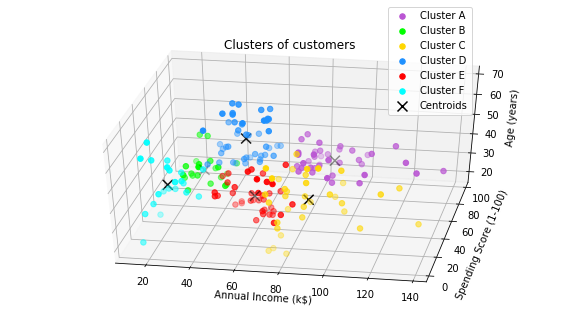

In [615]:
fig = plt.figure()
fig.set_size_inches(10, 5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_3D[C_3D_6 == 0, 1], x_3D[C_3D_6 == 0, 2], x_3D[C_3D_6 == 0, 0], color = 'mediumorchid', s = 30, label = 'Cluster A')
ax.scatter(x_3D[C_3D_6 == 1, 1], x_3D[C_3D_6 == 1, 2], x_3D[C_3D_6 == 1, 0], color = 'lime', s = 30, label = 'Cluster B')
ax.scatter(x_3D[C_3D_6 == 2, 1], x_3D[C_3D_6 == 2, 2], x_3D[C_3D_6 == 2, 0], color = 'gold', s = 30, label = 'Cluster C')
ax.scatter(x_3D[C_3D_6 == 3, 1], x_3D[C_3D_6 == 3, 2], x_3D[C_3D_6 == 3, 0], color = 'dodgerblue', s = 30, label = 'Cluster D')
ax.scatter(x_3D[C_3D_6 == 4, 1], x_3D[C_3D_6 == 4, 2], x_3D[C_3D_6 == 4, 0], color = 'red', s = 30, label = 'Cluster E')
ax.scatter(x_3D[C_3D_6 == 5, 1], x_3D[C_3D_6 == 5, 2], x_3D[C_3D_6 == 5, 0], color = 'cyan', s = 30, label = 'Cluster F')
ax.scatter(kmeans_3D_6.cluster_centers_[:, 1], kmeans_3D_6.cluster_centers_[:, 2], kmeans_3D_6.cluster_centers_[:, 0], color = 'black', s = 100, marker = 'x', label = 'Centroids')
ax.view_init(elev=40., azim=-80)
plt.title('Clusters of customers')
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Age (years)')
f = lambda x,y,z: proj3d.proj_transform(x,y,z, ax.get_proj())[:2]
ax.legend(loc="lower left", bbox_to_anchor=f(110,70,60), 
          bbox_transform=ax.transData)
plt.show()

In [616]:
A = np.array([[x_3D[C_3D_6 == 0, 0]], [x_3D[C_3D_6 == 0, 1]], [x_3D[C_3D_6 == 0, 2]]])
A_t = A.transpose()
B = np.array([[x_3D[C_3D_6 == 1, 0]], [x_3D[C_3D_6 == 1, 1]], [x_3D[C_3D_6 == 1, 2]]])
B_t = B.transpose()
C = np.array([[x_3D[C_3D_6 == 2, 0]], [x_3D[C_3D_6 == 2, 1]], [x_3D[C_3D_6 == 2, 2]]])
C_t = C.transpose()
D = np.array([[x_3D[C_3D_6 == 3, 0]], [x_3D[C_3D_6 == 3, 1]], [x_3D[C_3D_6 == 3, 2]]])
D_t = D.transpose()
E = np.array([[x_3D[C_3D_6 == 4, 0]], [x_3D[C_3D_6 == 4, 1]], [x_3D[C_3D_6 == 4, 2]]])
E_t = E.transpose()
F = np.array([[x_3D[C_3D_6 == 5, 0]], [x_3D[C_3D_6 == 5, 1]], [x_3D[C_3D_6 == 5, 2]]])
F_t = F.transpose()

In [617]:
print('Age customers in Cluster A:', min(A[0][0]),'-',max(A[0][0]))
print('Age customers in Cluster B:', min(B[0][0]),'-',max(B[0][0]))
print('Age customers in Cluster C:', min(C[0][0]),'-',max(C[0][0]))
print('Age customers in Cluster D:', min(D[0][0]),'-',max(D[0][0]))
print('Age customers in Cluster E:', min(E[0][0]),'-',max(E[0][0]))
print('Age customers in Cluster F:', min(F[0][0]),'-',max(F[0][0]))

Age customers in Cluster A: 27 - 40
Age customers in Cluster B: 18 - 35
Age customers in Cluster C: 19 - 59
Age customers in Cluster D: 43 - 70
Age customers in Cluster E: 18 - 40
Age customers in Cluster F: 19 - 67
